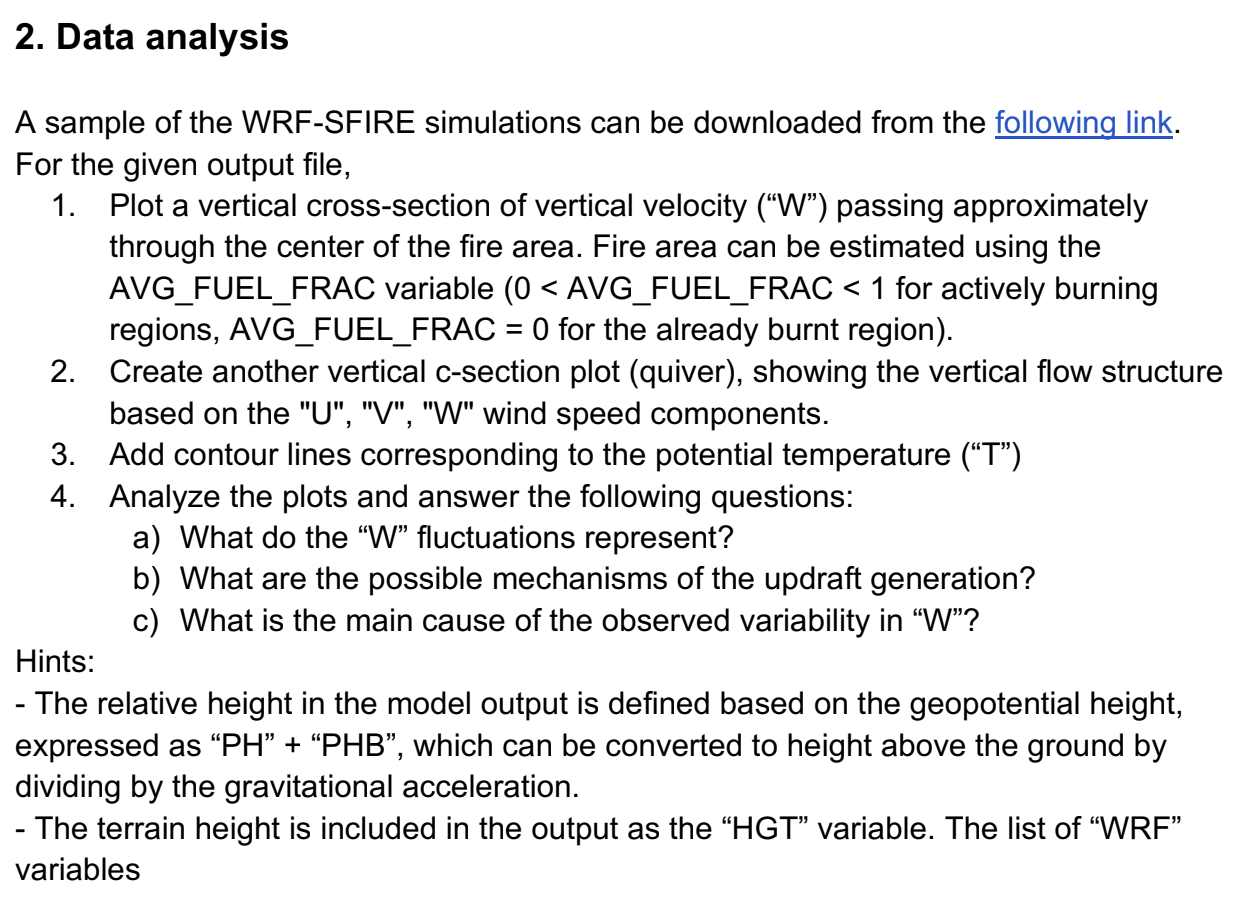

In [29]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

In [30]:
#Reading the dowloaded file
file_path = './wrfout_d04'
#Open netCDF file
ds = nc.Dataset(file_path)

In [31]:
#Varibles extracted from the netCDF file 
avg_fuel_frac = ds.variables['AVG_FUEL_FRAC'][:]
w = ds.variables['W'][:]
u = ds.variables['U'][:]
v = ds.variables['V'][:]
t = ds.variables['T'][:]
ph = ds.variables['PH'][:]
phb = ds.variables['PHB'][:]
hgt = ds.variables['HGT'][:]

$$\textbf{PART 1} $$

In [32]:
#Calculating fire area, center of fire area and height (using 9.81 m/s^2 for gravity)
fire_area = (avg_fuel_frac > 0) & (avg_fuel_frac < 1)
fire_center = np.mean(np.where(fire_area), axis=1).astype(int)
height = (ph + phb) / 9.81

In [33]:
#find the vertical cross section of vertical velocity ("W") 
time = 0
fc = fire_center[2]
W = w[time, :, fc, :]                    # w cross section
height_cross_section = height[time, :, fc, :]
x = np.arange(W.shape[1])                # Horizontal distance
y = height_cross_section[:, 0]           # Vertical height levels
X, Y = np.meshgrid(x, y)                 # Meshgrid for plotting

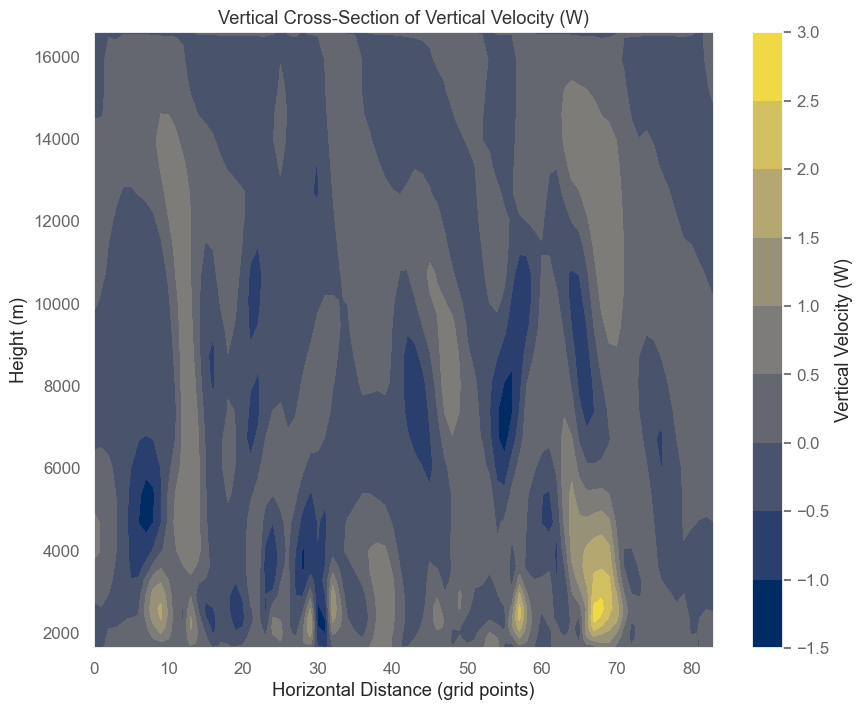

In [34]:
#Plot the vertical cross-section
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, W, cmap= 'cividis')
plt.colorbar(label='Vertical Velocity (W)')
plt.title('Vertical Cross-Section of Vertical Velocity (W)')
plt.xlabel('Horizontal Distance (grid points)')
plt.ylabel('Height (m)')
plt.show()

In [35]:
U = u[time, :, fc, :]
V = v[time, :, fc, :]
U = U[:W.shape[0], :W.shape[1]]
V = V[:W.shape[0], :W.shape[1]]

In [36]:
min_shape = (min(U.shape[0], W.shape[0], height_cross_section.shape[0]),
             min(U.shape[1], W.shape[1], height_cross_section.shape[1]))

def shapeAdj(arr):
    return arr[:min_shape[0], :min_shape[1]]

$$\textbf{PART 2} $$

In [37]:
#Changing the CS so that they all have the same shape
U = shapeAdj(U)
V = shapeAdj(V)
W = shapeAdj(W)
height_cross_section = shapeAdj(height_cross_section)

x = np.arange(W.shape[1])                # Horizontal distance
y = height_cross_section[:, 0]           # Vertical height levels
X, Y = np.meshgrid(x, y)                 # Meshgrid for plotting

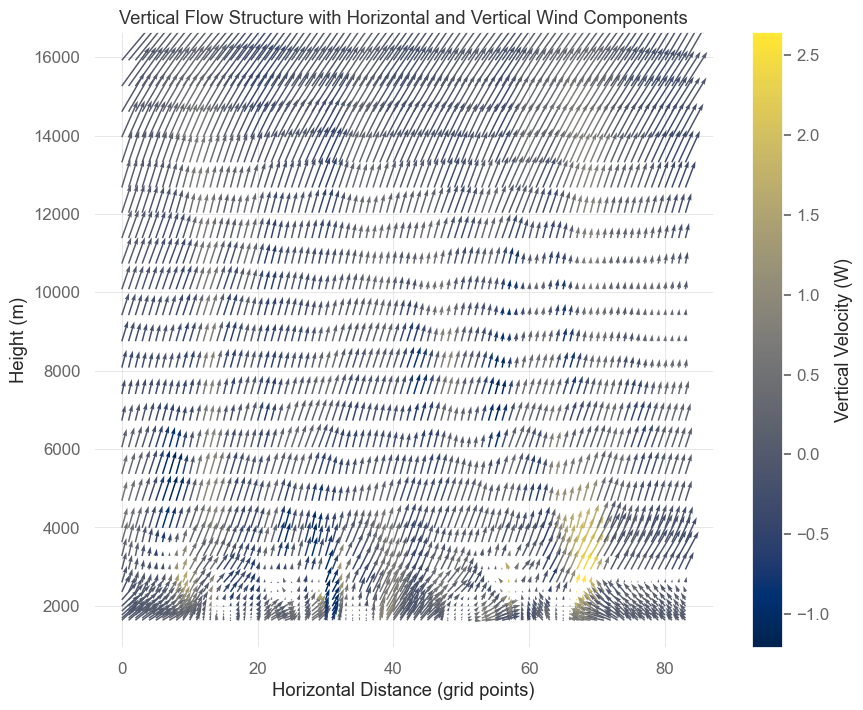

In [44]:
#Plotting the quiver plot
plt.figure(figsize=(10, 8))
quiver = plt.quiver(X, Y, U, V, W, cmap='cividis', scale=2, scale_units='xy')

plt.colorbar(quiver, label='Vertical Velocity (W)')

#Titles
plt.title('Vertical Flow Structure with Horizontal and Vertical Wind Components')
plt.xlabel('Horizontal Distance (grid points)')
plt.ylabel('Height (m)')

plt.show()

$$\textbf{PART 3} $$

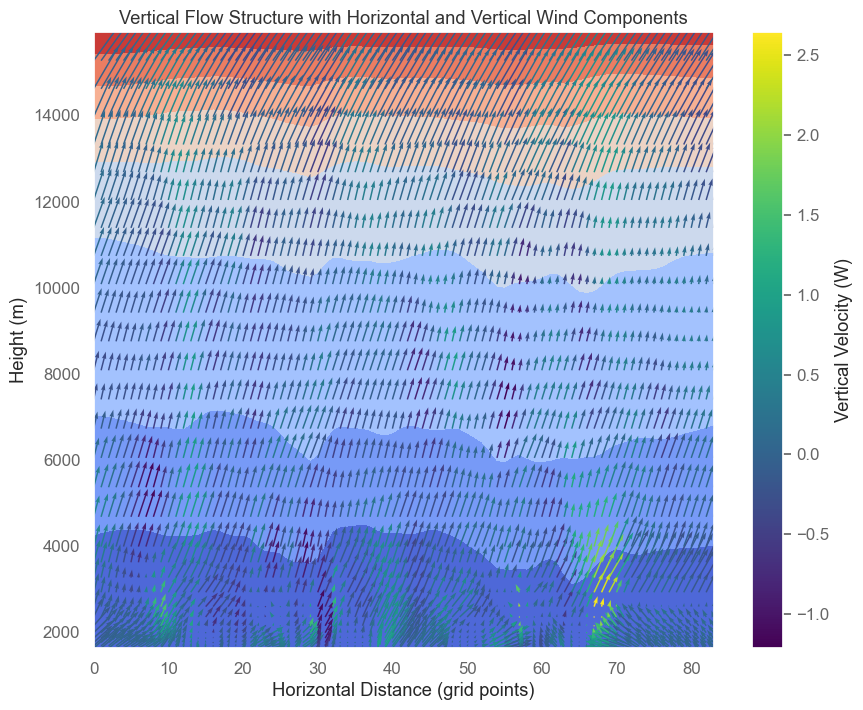

In [43]:
#Creating the temprature countour plot and layering it underneath the previous quiver plot
T = t[time, :, fc, :]

plt.figure(figsize=(10, 8))

contour = plt.contourf(X, Y, T, cmap='coolwarm')
quiver = plt.quiver(X, Y, U, V, W, cmap= 'viridis', scale=2, scale_units='xy')
plt.colorbar(quiver, label='Vertical Velocity (W)')

#Titles
plt.title('Vertical Flow Structure with Horizontal and Vertical Wind Components')
plt.xlabel('Horizontal Distance (grid points)')
plt.ylabel('Height (m)')

plt.show()

$$\textbf{PART 4} $$

$$\textbf{What do the “W” fluctuations represent?} $$

The fluctiation in ("W") represents the changes in vertical wind velocity. 
The areas with a positive value for W, the air ius moving upwards. This is likeley
cause by hotter air created by the heat of the fire.
On the contrary, the negative W represents cold air moving down (downdraft). This is also and important 
factor as it feeds the fire allowing it to be more or less intense. 

$$\textbf{What are the possible mechanisms of the updraft generation?} $$

The primary mechanism causing the updraft would be heating the air (conductivly). As the
air heats up, its density decreases and hence, it moves upwards.

$$\textbf{What is the main cause of the observed variability in “W”?} $$

The observed varible would be due to different areas having varying intensity of fire. 
The fire intensity is not constant across the fire area and hence, the buoyancy of the air will
alter respectivly. Reigons with high values for W likeley indicate areas where hot air is meeting cool air
causing rapid movement of the air. 
Also as seen, when the potential temprature decreases, the updraft fluctuation of W is a lot greater, illustrating
that potential temprature likely plays a role in W. 